In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
dataset = pd.read_csv('credit_card_challenge.csv')
print(len(dataset))

30000


In [3]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


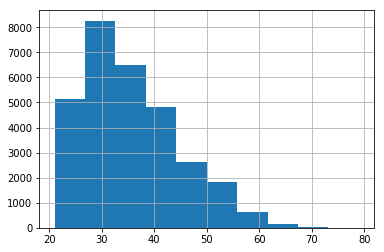

In [4]:
dataset.AGE.hist()

In [5]:
dataset = dataset[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
dataset.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,20000.0,24,3913.0,0.0,689.0,0.0,0.0
1,120000.0,26,2682.0,0.0,1000.0,1000.0,1000.0
2,90000.0,34,29239.0,1518.0,1500.0,1000.0,1000.0
3,50000.0,37,46990.0,2000.0,2019.0,1200.0,1100.0
4,50000.0,57,8617.0,2000.0,36681.0,10000.0,9000.0


In [6]:
#SPLIT DATASET
X = dataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = dataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [7]:
X.head()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4
0,20000.0,3913.0,0.0,689.0,0.0,0.0
1,120000.0,2682.0,0.0,1000.0,1000.0,1000.0
2,90000.0,29239.0,1518.0,1500.0,1000.0,1000.0
3,50000.0,46990.0,2000.0,2019.0,1200.0,1100.0
4,50000.0,8617.0,2000.0,36681.0,10000.0,9000.0


In [8]:
y.head()

,AGE
0,24
1,26
2,34
3,37
4,57


In [9]:
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.27 (+/- 0.09)


In [11]:
# Since all the data is right skewed, I'll try log transforming the data to see if that improves accuracy.

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


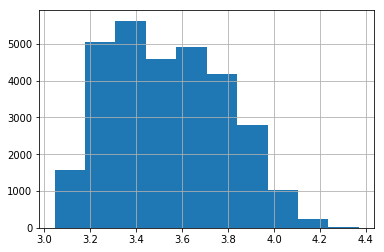

In [12]:
dataset['AGE'] = np.log(dataset.AGE)
dataset['LIMIT_BAL'] = np.log(dataset.LIMIT_BAL)
dataset['BILL_AMT1'] = np.where(dataset.BILL_AMT1 > 0, np.log(dataset.BILL_AMT1), 0)
dataset['PAY_AMT1'] = np.where(dataset.PAY_AMT1 > 0, np.log(dataset.PAY_AMT1), 0)
dataset['PAY_AMT2'] = np.where(dataset.PAY_AMT2 > 0, np.log(dataset.PAY_AMT2), 0)
dataset['PAY_AMT3'] = np.where(dataset.PAY_AMT3 > 0, np.log(dataset.PAY_AMT3), 0)
dataset['PAY_AMT4'] = np.where(dataset.PAY_AMT4 > 0, np.log(dataset.PAY_AMT4), 0)

logdataset = dataset[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]
logdataset.AGE.hist()

In [13]:
#SPLIT DATASET
X = logdataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = logdataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [14]:
from sklearn import neighbors
#Building the model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.28 (+/- 0.10)


In [16]:
# Running nearest neigbors again, weighted by distance.

In [17]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=30)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: -0.30 (+/- 0.10)


In [18]:
# OLS model begins here

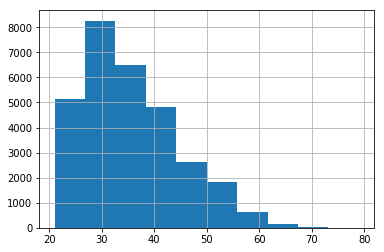

In [19]:
dataset = pd.read_csv('credit_card_challenge.csv')

dataset = dataset[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
dataset.head()
dataset.AGE.hist()

#SPLIT DATASET
X = dataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = dataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

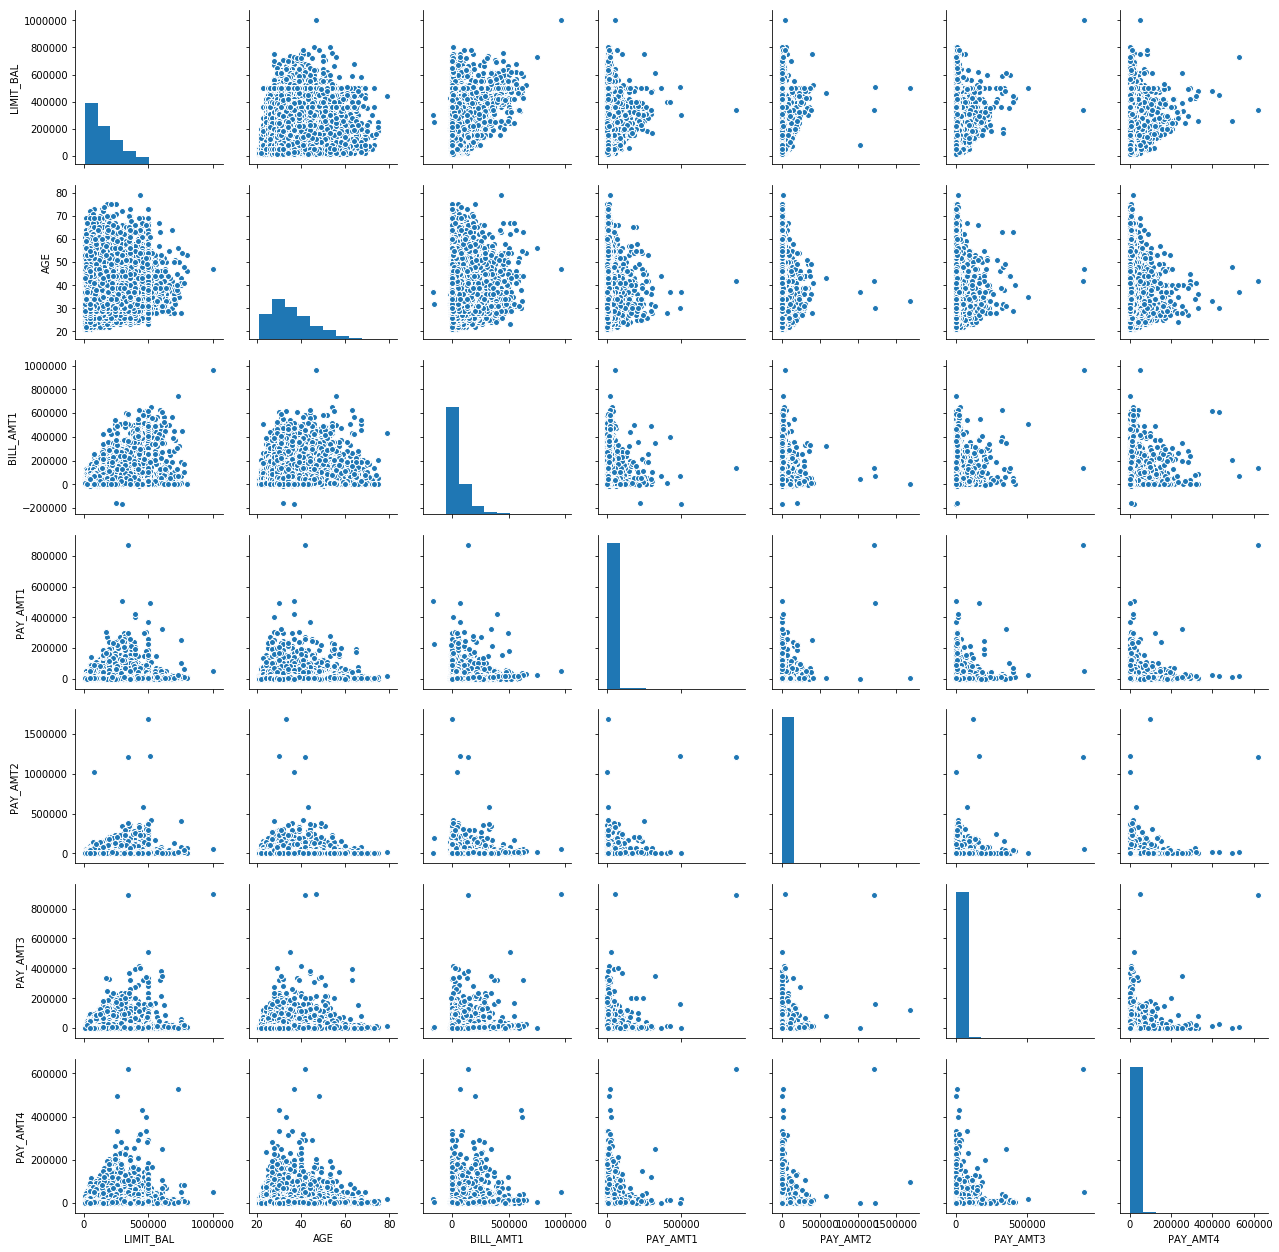

In [20]:
import seaborn as sns
sns.pairplot(dataset)

           LIMIT_BAL       AGE  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
LIMIT_BAL   1.000000  0.144713   0.285430  0.195236  0.178408  0.210167   
AGE         0.144713  1.000000   0.056239  0.026147  0.021785  0.029247   
BILL_AMT1   0.285430  0.056239   1.000000  0.140277  0.099355  0.156887   
PAY_AMT1    0.195236  0.026147   0.140277  1.000000  0.285576  0.252191   
PAY_AMT2    0.178408  0.021785   0.099355  0.285576  1.000000  0.244770   
PAY_AMT3    0.210167  0.029247   0.156887  0.252191  0.244770  1.000000   
PAY_AMT4    0.203242  0.021379   0.158303  0.199558  0.180107  0.216325   

           PAY_AMT4  
LIMIT_BAL  0.203242  
AGE        0.021379  
BILL_AMT1  0.158303  
PAY_AMT1   0.199558  
PAY_AMT2   0.180107  
PAY_AMT3   0.216325  
PAY_AMT4   1.000000  


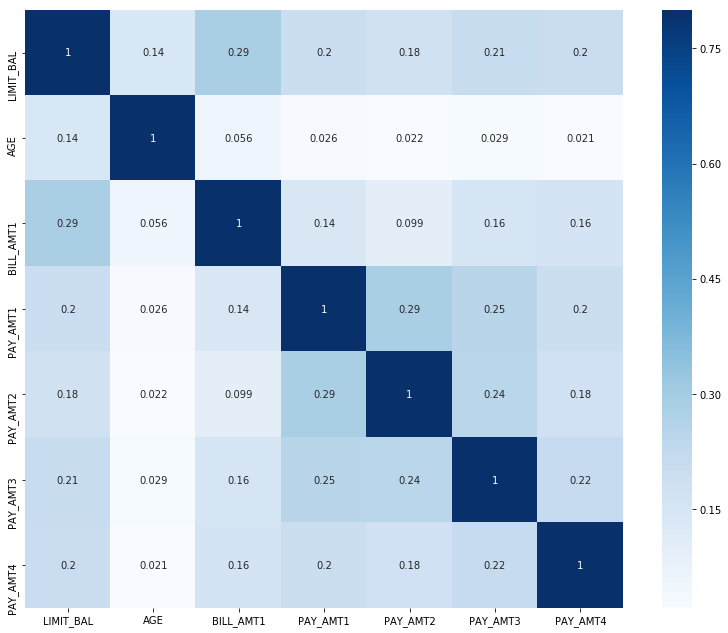

In [21]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [22]:
# Since all the data is right skewed, I'll try log transforming the data to see if that improves accuracy.

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


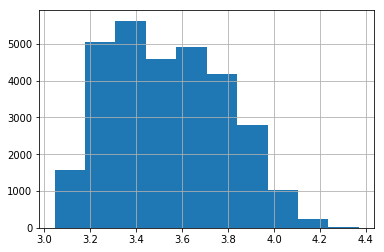

In [23]:
dataset['AGE'] = np.log(dataset.AGE)
dataset['LIMIT_BAL'] = np.log(dataset.LIMIT_BAL)
dataset['BILL_AMT1'] = np.where(dataset.BILL_AMT1 > 0, np.log(dataset.BILL_AMT1), 0)
dataset['PAY_AMT1'] = np.where(dataset.PAY_AMT1 > 0, np.log(dataset.PAY_AMT1), 0)
dataset['PAY_AMT2'] = np.where(dataset.PAY_AMT2 > 0, np.log(dataset.PAY_AMT2), 0)
dataset['PAY_AMT3'] = np.where(dataset.PAY_AMT3 > 0, np.log(dataset.PAY_AMT3), 0)
dataset['PAY_AMT4'] = np.where(dataset.PAY_AMT4 > 0, np.log(dataset.PAY_AMT4), 0)

logdataset = dataset[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4']]
dataset.AGE.hist()

In [24]:
#SPLIT DATASET
X = logdataset[['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4' ]]
y = logdataset[['AGE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [25]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std 

linear_formula = 'AGE ~ LIMIT_BAL+BILL_AMT1+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 23 Sep 2018   Prob (F-statistic):          1.27e-198
Time:                        20:26:39   Log-Likelihood:                -695.78
No. Observations:               30000   AIC:                             1406.
Df Residuals:                   29993   BIC:                             1464.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0062      0.019    160.916      0.000       2.970       3.043
LIMIT_BAL      0.0470      0.002     29.931      0.000       0.044       0.050
BILL_AMT1     -0.0005      0.001     -0.908      0.364      -0.002       0.001
PAY_AMT1      -0.0008      0.001     -1.403      0.161      -0.002       0.000
PAY_AMT2      -0.0002      0.001     -0.424      0.671      -0.001       0.001
PAY_AMT3      -0.0014      0.001     -2.633      0.008      -0.002      -0.000
PAY_AMT4       0.0003      0.001      0.616      0.538      -0.001       0.001
==============================================================================
Omnibus:                     2194.294   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1373.445
Skew:                           0.398   Prob(JB):                    5.76e-299
Kurtosis:                       2.317   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = logdataset.drop('AGE', axis=1)
y = logdataset.AGE.values

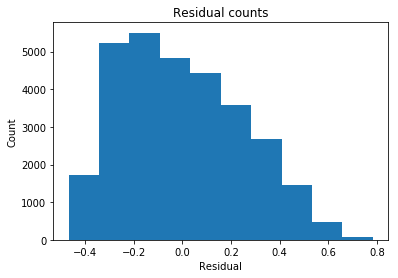

In [28]:
# Extract predicted values.
predicted = lm.predict(X).ravel()
actual = y


# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


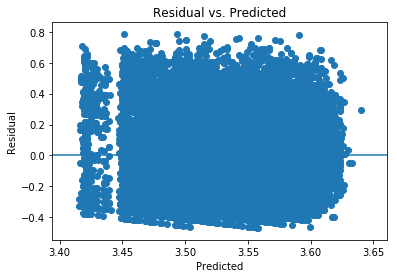

In [29]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

There is a linear relationship between X and Y, the variance is constant for 95% of the graph (after 360 it begins to taper in toward the mean).  There is an unaccaptably large percentage of values that are farther than two standard deviations of the mean, showing that this model is a poor fit to the observed data.

Null Hypothesis: Age cannot be determined by credit behavior
Alternative Hypothesis: Age can be determined by credit behaviour

I compared my KNN and Regression models against credit card data in an attempt to predict age using billing amount, payment amount, and credit limit features, these were the continuous data features in this dataset. 

All features were right skewed I ran models against the data in it's given form and then log transformed to normalize the data.

I'm going to call this a failed experiment, no matter which version of my model I ran (normal or log transformed, KNN or OLS regression) I was unable to account for  more than 30% of the variability in age.  I fail to reject the null hypothesis.

If I had to choose between the two models, I would choose KNN, because the highest R-squared values were attained with that model.  The OLS regression model was only able to generate a .03 R-squared value.

But the reallity is, age cannot be predicted with the information I have available.